In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import backtrader as bt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyfolio as pf
import quantstats
import math
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [13]:
start = '2011-09-22'
end = '2021-05-28'

vti = web.DataReader('VTI', 'yahoo', start, end)['Adj Close'].to_frame("vti_Close")
vea = web.DataReader('VEA', 'yahoo', start, end)['Adj Close'].to_frame("vea_Close")
vwo = web.DataReader('VWO', 'yahoo', start, end)['Adj Close'].to_frame("vwo_Close")
ltpz = web.DataReader('LTPZ', 'yahoo', start, end)['Adj Close'].to_frame("ltpz_Close")
schp = web.DataReader('SCHP', 'yahoo', start, end)['Adj Close'].to_frame("schp_Close")
xlp = web.DataReader('XLP', 'yahoo', start, end)['Adj Close'].to_frame("xlp_Close")
kxi = web.DataReader('KXI', 'yahoo', start, end)['Adj Close'].to_frame("kxi_Close")
iau = web.DataReader('IAU', 'yahoo', start, end)['Adj Close'].to_frame("iau_Close")
gunr = web.DataReader('GUNR', 'yahoo', start, end)['Adj Close'].to_frame("gunr_Close")

In [14]:
vti_return = vti.pct_change(periods=1)
vea_return = vea.pct_change(periods=1)
vwo_return = vwo.pct_change(periods=1)
ltpz_return = ltpz.pct_change(periods=1)
schp_return = schp.pct_change(periods=1)
xlp_return = xlp.pct_change(periods=1)
kxi_return = kxi.pct_change(periods=1)
iau_return = iau.pct_change(periods=1)
gunr_return = gunr.pct_change(periods=1)

df_return = pd.concat([vti_return, vea_return, vwo_return, ltpz_return, schp_return, xlp_return, kxi_return, iau_return, gunr_return], axis=1)

df_return.head()

,vti_Close,vea_Close,vwo_Close,ltpz_Close,schp_Close,xlp_Close,kxi_Close,iau_Close,gunr_Close
Date,,,,,,,,,
2011-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-22,-0.030764,-0.035714,-0.069286,0.006716,-0.000543,-0.018994,-0.019639,-0.024713,NaN
2011-09-23,0.005827,0.009854,0.021944,-0.014738,-0.006346,0.002038,0.002956,-0.055981,-0.057576
2011-09-26,0.023621,0.022207,0.009785,-0.012911,-0.004197,0.019322,0.024558,-0.014357,0.006431
2011-09-27,0.012633,0.022383,0.031494,0.000478,0.000000,0.005986,0.006232,0.020266,0.027795


In [19]:
df_return['NewAllSeason_return'] = df_return['vti_Close']*0.2+df_return['vea_Close']*0.1+df_return['vwo_Close']*0.1+df_return['ltpz_Close']*0.2+df_return['xlp_Close']*0.2+df_return['iau_Close']*0.1+df_return['gunr_Close']*0.1
df_return.head()

,vti_Close,vea_Close,vwo_Close,ltpz_Close,schp_Close,xlp_Close,kxi_Close,iau_Close,gunr_Close,NewAllSeason_return
Date,,,,,,,,,,
2011-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-22,-0.030764,-0.035714,-0.069286,0.006716,-0.000543,-0.018994,-0.019639,-0.024713,NaN,NaN
2011-09-23,0.005827,0.009854,0.021944,-0.014738,-0.006346,0.002038,0.002956,-0.055981,-0.057576,-0.007872
2011-09-26,0.023621,0.022207,0.009785,-0.012911,-0.004197,0.019322,0.024558,-0.014357,0.006431,0.010156
2011-09-27,0.012633,0.022383,0.031494,0.000478,0.000000,0.005986,0.006232,0.020266,0.027795,0.013918


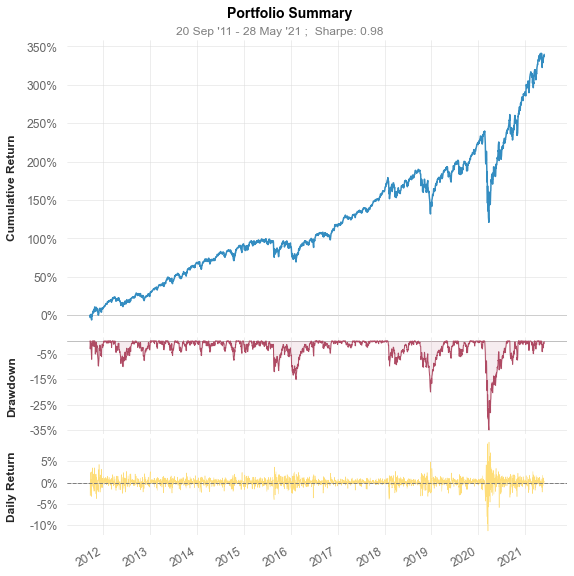

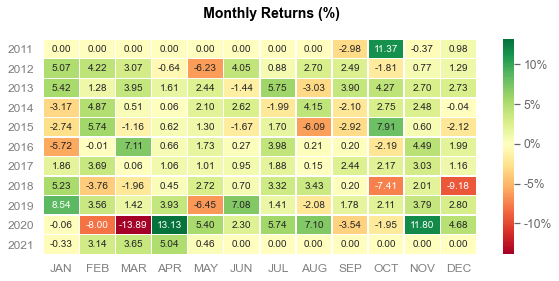

In [22]:
quantstats.reports.plots(df_return['NewAllSeason_return'], mode='basic')

In [24]:
quantstats.reports.metrics(df_return['NewAllSeason_return'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2011-09-21
End Period                 2021-05-28
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          339.74%
CAGR%                      16.51%
Sharpe                     0.98
Sortino                    1.38
Max Drawdown               -35.0%
Longest DD Days            350
Volatility (ann.)          17.08%
Calmar                     0.47
Skew                       -0.63
Kurtosis                   16.71

Expected Daily %           0.06%
Expected Monthly %         1.27%
Expected Yearly %          14.41%
Kelly Criterion            9.78%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.7%
Expected Shortfall (cVaR)  -1.7%

Payoff Ratio               0.96
Profit Factor              1.21
Common Sense Ratio         1.15
CPC Index                  0.65
Tail Ratio                 0.95
Outlier Win Ratio          3.78
Outlier Loss Ratio         4

In [18]:
quantstats.reports.html(df_return['NewAllSeason_return'], output='Report_AssetAllocation_NewAllSeasons.html', title='NewAllSeasons')